# AMES HOUSING PROJECT

## MODEL SELECTON

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
#Importing the train data
train_final = pd.read_csv('train_final.csv')
train_final = train_final.drop(['Unnamed: 0'], axis = 1)# dropped the added column Unnamed


In [3]:
train_final.shape

(1460, 261)

In [5]:
#Importing the test data
test_final = pd.read_csv('test_final.csv')
test_final = test_final.drop(['Unnamed: 0'], axis = 1)
test_final.head(3)

,LotFrontage,LotArea,LandSlope,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.557449,11622,0.0,4.0,1961,1961,0.0,3.0,3.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,0.603098,14267,0.0,5.0,1958,1958,108.0,3.0,3.0,1.0,...,0,0,0,0,1,0,0,0,1,0
2,0.280296,13830,0.0,4.0,1997,1998,0.0,3.0,4.0,1.0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
test_final.shape

(1459, 255)

### Train-test split

In [7]:
#Assigning the train data X(dropped sale price and Log sale price) and train data Y(which is Log Sale price)

train_final_x = train_final.drop(['SalePrice', 'LogSalePrice'], axis = 1)
train_final_y = train_final['LogSalePrice']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_final_x, train_final_y, test_size = 0.2, random_state = 42)

In [155]:
results = pd.DataFrame(columns = ['Model','R^2_train','R^2_test', 'MAE', 'RMSE', 'y_test', 'y_predicted'])
results

,Model,R^2_train,R^2_test,MAE,RMSE,y_test,y_predicted


# Multiple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


lr = LinearRegression()
lr.fit(X_train, y_train)


train_predict_ML = lr.predict(X_train)
train_MAE_ML = mean_absolute_error(y_train, train_predict_ML)
train_RMSE_ML = np.sqrt(mean_squared_error(y_train, train_predict_ML))

test_predict_ML = lr.predict(X_test)
test_MAE_ML = mean_absolute_error(y_test, test_predict_ML)
test_RMSE_ML = np.sqrt(mean_squared_error(y_test, test_predict_ML))

print('R^2 for train set: %.3f' %lr.score(X_train, y_train))
print('R^2 for test set %.3f' %lr.score(X_test, y_test))

print('-' * 50)

print('MAE for train set %.3f' %train_MAE_ML)
print('MAE for test set %.3f' %test_MAE_ML)

print('-' * 50)

print('RMSE for the train set %.3f' %train_RMSE_ML)
print('RMSE for the test set %.3f' %test_RMSE_ML)

R^2 for train set: 0.924
R^2 for test set 0.896
--------------------------------------------------
MAE for train set 0.077
MAE for test set 0.101
--------------------------------------------------
RMSE for the train set 0.108
RMSE for the test set 0.140


As expected, the multiple linear regression R2 differs between train set (92.6%) and test set (89.6% due to overfitting)

In [156]:
#appending the data in results dataframe
results = results.append({'Model' : 'Multiple Regression' , 'R^2_train' :92.4, 'R^2_test' :89.6, 'MAE' : 0.108, 'RMSE' : 0.139, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(test_predict_ML))},
               ignore_index = True)

In [13]:
print(np.mean(np.exp(train_predict_ML)))
print(np.mean(np.exp(test_predict_ML)))

180153.9142966788
175780.25277530018


Due to high variance the predicted sale price of the test and train sets are varies a lot.

## Cook's Distance 

Since the linear models as well as tree based models are sensitive to outliers.
So removal of outliers would help in better model performace

So the outliers were removed by Cook's method

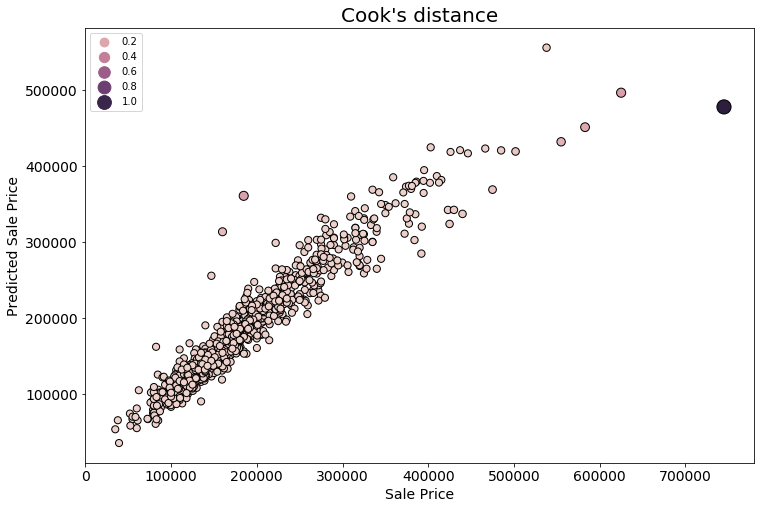

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence
# fit the regression model using statsmodels library 
f = 'np.exp(y_train) ~ np.exp(train_predict_ML)'
model = ols(formula=f, data= X_train).fit()


# calculate the cooks_distance - the OLSInfluence object contains multiple influence measurements
cook_distance = OLSInfluence(model).cooks_distance
(distance, p_value) = cook_distance

# scatter plot - x axis (independent variable height), y-axis (dependent variable weight), size and color of the marks according to its cook's distance
sns.scatterplot(x = np.exp(y_train), y = np.exp(train_predict_ML), hue=distance, size=distance, sizes=(50, 200), edgecolor='black', linewidth=1)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Predicted Sale Price', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


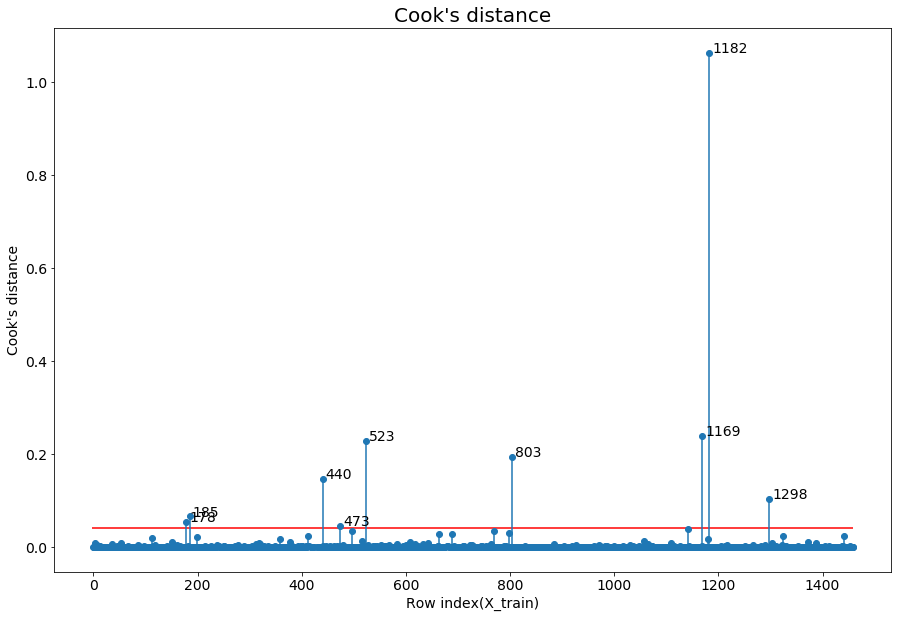

In [19]:
threshold = 4/100 # can change this
plt.figure(figsize=(15,10))
# stem plot - the x-axis represents the index of the observation and the y-axis its Cook's distance
plt.stem(distance.index, distance.values, basefmt=" ")

# horizontal line showing the threshold value
plt.hlines(threshold, -2, 1459, 'r')

# the observations with Cook's distances higher than the threshold value are labeled in the plot
outlier_data = distance[distance > threshold]

for index, value in outlier_data.items():
    plt.text(index + 6, value, str(index), fontsize=14)

# ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Row index(X_train)', fontsize=14)
plt.ylabel('Cook\'s distance', fontsize=14)
plt.title('Cook\'s distance', fontsize=20);

In [20]:
#Cook's distance greater than 
outlier_data

1182    1.062555
178     0.054210
523     0.227306
1298    0.102877
440     0.146828
1169    0.238657
803     0.193837
185     0.065667
473     0.046100
dtype: float64

In [21]:
outlier_data.index

Int64Index([1182, 178, 523, 1298, 440, 1169, 803, 185, 473], dtype='int64')

In [22]:
X_train.loc[outlier_data.index, :].shape

(9, 259)

In [24]:
X_train1 = X_train.drop(outlier_data.index, axis= 0)
y_train1 = y_train.drop(outlier_data.index, axis = 0)

# Ridge Regression

In [39]:
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge(normalize = True)
ridge.set_params(alpha=1.0)
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.8877814190162098

The accuracy score before getting best alpha for the train set in 90.67%

In [48]:
#selecting the best alpha
R2Ridge_train = []
R2Ridge_test = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha)  
    ridge.fit(X_train1, y_train1)
    R2Ridge_train.append(ridge.score(X_train1, y_train1))
    R2Ridge_test.append(ridge.score(X_test, y_test))

In [50]:
#Getting the maximum accuracy for train set
R2_max_train = np.max(R2Ridge_train)
R2_max_train

0.9361308172915281

In [51]:
#Getting the maximum accuracy and its corrresponding alpha for test set
R2_max = np.max(R2Ridge_test)
index = np.where(R2Ridge_test == R2_max)
best_alpha = alphaRange[index]
R2_max

0.9004666880429748

In [46]:
#Getting the R2, MAE and RMSE for the ridge regression.
ridge.set_params(alpha = float(best_alpha))
ridge.fit(X_train1, y_train1)

train_predict_ridge = ridge.predict(X_train1)
train_MAE = mean_absolute_error(y_train1, train_predict_ridge)
train_RMSE = np.sqrt(mean_squared_error(y_train1, train_predict_ridge))

test_predict_ridge = ridge.predict(X_test)
test_MAE = mean_absolute_error(y_test, test_predict_ridge)
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict_ridge))

print('The ridge score for the train set %.3f' %ridge.score(X_train1, y_train1))
print('The ridge score for the test set %.3f' %ridge.score(X_test, y_test))

print('-' * 50)

print('MAE for train set %.3f' %train_MAE)
print('MAE for test set %.3f' %test_MAE)

print('-' * 50)

print('RMSE for the train set %.3f' %train_RMSE)
print('RMSE for the test set %.3f' %test_RMSE)

The ridge score for the train set 0.936
The ridge score for the test set 0.900
--------------------------------------------------
MAE for train set 0.069
MAE for test set 0.099
--------------------------------------------------
RMSE for the train set 0.096
RMSE for the test set 0.136


In [157]:
#appending the results
results = results.append({'Model' : 'Ridge Regression' , 'R^2_train' :93.6, 'R^2_test' :90.0, 'MAE' : 0.099, 'RMSE' : 0.136, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(test_predict_ridge))},
               ignore_index = True)

**The Ridge model also suffered overfitting but the accuracy improved 92.4 from to 93.6%**

# Lasso Regression

In [52]:
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso(normalize = True)

In [53]:
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

**Lasso with different alpha**

In [54]:
R2Lasso_train = []
R2Lasso_test = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha)  
    lasso.fit(X_train1, y_train1)
    R2Lasso_train.append(lasso.score(X_train1, y_train1))
    R2Lasso_test.append(lasso.score(X_test, y_test))

In [55]:
LassoR2_max = np.max(R2Lasso_test)
index_lasso = np.where(R2Lasso_test == LassoR2_max)
best_alpha = alphaRange[index_lasso]

In [56]:
LassoR2_max

0.8527527212964936

In [57]:
best_alpha

array([0.001])

In [58]:
R2_max_train = np.max(R2Lasso_train)

In [59]:
R2_max_train

0.8551322691864842

**Lasso after 10 fold cross validationa and range of alpha**

In [60]:
lassocv = LassoCV(alphas = alphaRange, normalize = True, cv = 5, max_iter = 10000)

In [73]:
#Getting the R2, MAE and RMSE for the lasso regression.
lassocv.fit(X_train1, y_train1)
best_alpha_lasso = lassocv.alpha_


train_predict_lasso = lassocv.predict(X_train1)
train_MAE_lasso = mean_absolute_error(y_train1, train_predict_lasso)
train_RMSE_lasso = np.sqrt(mean_squared_error(y_train1, train_predict_lasso))

test_predict_lasso = lassocv.predict(X_test)
test_MAE_lasso = mean_absolute_error(y_test, test_predict_lasso)
test_RMSE_lasso = np.sqrt(mean_squared_error(y_test, test_predict_lasso))



print("R^2 train set: %f" %lassocv.score(X_train1, y_train1))
print("R^2 test set: %f" %lassocv.score(X_test, y_test))
print('-' * 50)

print('MAE for train set %.3f' %train_MAE_lasso)
print('MAE for test set %.3f' %test_MAE_lasso)

print('-' * 50)


print('RMSE for train data is: %.3f' % train_RMSE_lasso)
print('RMSE for test data is: %.3f' % test_RMSE_lasso)

R^2 train set: 0.855132
R^2 test set: 0.852753
--------------------------------------------------
MAE for train set 0.103
MAE for test set 0.113
--------------------------------------------------
RMSE for train data is: 0.145
RMSE for test data is: 0.166


The before and after cross validation the best lambda is 0.001 and the accuracy had gone down but the variance has also reduced. The accuracy for the train set is 85.5% and the test set is 85.27%

In [158]:
results = results.append({'Model' : 'Lasso Regression' , 'R^2_train' :85.5, 'R^2_test' :85.2, 'MAE' : 0.133, 'RMSE' : 0.168, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(test_predict_lasso))},
               ignore_index = True)

In [65]:
results

,Model,R^2_train,R^2_test,MAE,RMSE,y_test,y_predicted
0,Multiple Regression,92.4,89.6,0.108,0.139,178839.811644,175780.252775
1,Ridge Regression,93.6,90.0,0.099,0.136,178839.811644,177306.200829
2,Lasso Regression,85.5,85.2,0.133,0.168,178839.811644,172971.511394


In [66]:
#Creating the coefficiens dataframe  
coefs_lasso = pd.DataFrame(abs(lassocv.coef_))
LassoFeatures_coef = pd.concat([pd.DataFrame(X_train.columns), coefs_lasso], axis = 1)
LassoFeatures_coef.columns = ['Feature', 'Coef']

In [67]:
LassoFeatures_coef

,Feature,Coef
0,LotFrontage,0.000000e+00
1,LotArea,3.296943e-07
2,LandSlope,0.000000e+00
3,OverallQual,7.150170e-02
4,YearBuilt,0.000000e+00
...,...,...
254,SaleCondition_AdjLand,0.000000e+00
255,SaleCondition_Alloca,0.000000e+00
256,SaleCondition_Family,0.000000e+00
257,SaleCondition_Normal,0.000000e+00


In [68]:
#Selecting only the coeefients greater than zero(imp feature selection)
lasso_selectedFeatures = LassoFeatures_coef[LassoFeatures_coef['Coef'] > 0]
lasso_selectedFeatures = lasso_selectedFeatures.sort_values(by = 'Coef', ascending = False)
lasso_selectedFeatures

,Feature,Coef
30,TotalSF,1.308470e-01
3,OverallQual,7.150170e-02
21,GarageCars,5.238319e-02
31,TotalBath,3.710930e-02
56,MSZoning_RM,3.659220e-02
18,KitchenQual,3.584993e-02
137,CentralAir_Y,3.076461e-02
7,ExterQual,1.058532e-02
20,FireplaceQu,7.722767e-03
9,BsmtExposure,2.384001e-03


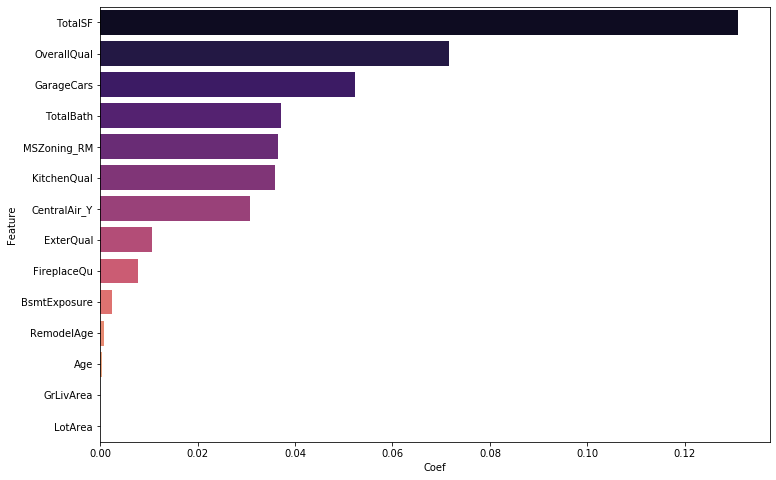

In [69]:
sns.barplot(x="Coef", y="Feature", data=lasso_selectedFeatures,palette="magma" )

## Refitting the multiple regression model with Lasso selected features

In [180]:
selected_feature = lasso_selectedFeatures['Feature'].to_list()
X_train_selFeat = X_train1[selected_feature]
X_test_selFeat = X_test[selected_feature]

In [71]:
#Getting the R2, MAE and RMSE for the multiple regression with lasso selected features.
mlr = LinearRegression()

mlr.fit(X_train_selFeat, y_train1) #multiple linear regression with lasso best features

y_trainpredicted_mlr = mlr.predict(X_train_selFeat)
RMSE_train2 = np.sqrt(mean_squared_error(y_train1, y_trainpredicted_mlr))
MAE_train2 = mean_absolute_error(y_train1, y_trainpredicted_mlr)


y_testpredicted_mlr = mlr.predict(X_test_selFeat)
RMSE_test2 = np.sqrt(mean_squared_error(y_test,y_testpredicted_mlr))
MAE_test2 = mean_absolute_error(y_test,y_testpredicted_mlr)


#print("Best Lambda: " + str(alpha_lasso3))
print("R^2 train set: %f" %mlr.score(X_train_selFeat, y_train1))
print("R^2 test set: %f" %mlr.score(X_test_selFeat, y_test))

print('-'*50)

print('MAE for train data is: %.3f' % MAE_train2)
print('MAE for test data is: %.3f' % MAE_test2)

print('-'*50)

print('RMSE for train data is: %.3f' % RMSE_train2)
print('RMSE for test data is: %.3f' % RMSE_test2)

R^2 train set: 0.885002
R^2 test set: 0.882125
--------------------------------------------------
MAE for train data is: 0.095
MAE for test data is: 0.104
--------------------------------------------------
RMSE for train data is: 0.129
RMSE for test data is: 0.148


In [159]:
results = results.append({'Model' : 'Multiple Regression(Improvised)' , 'R^2_train' :88.5, 'R^2_test' :88.2, 'MAE' : 0.336, 'RMSE' : 0.166, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(y_testpredicted_mlr))},
               ignore_index = True)


# Random Forest

In [74]:
from sklearn import ensemble
import sklearn.model_selection as ms
randomForest = ensemble.RandomForestRegressor()

In [75]:
randomForest.set_params(random_state=0)

randomForest.fit(X_train1, y_train1) 

print("The training accuracy is: %.3f" % (randomForest.score(X_train1, y_train1)))
print("The test accuracy is: %.3f" % (randomForest.score(X_test, y_test)))

The training accuracy is: 0.981
The test accuracy is: 0.875


**Random Forest with grisd search and cross validation**

In [76]:
grid_para_forest = {'criterion': ['mse'],
                    'min_samples_split': [2],
                    'max_depth': [15],
                    'n_estimators': [150],
                    'min_samples_leaf':[2],
                     
                
                    'max_features': [15],
                   
                    'random_state' :[42]}
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='r2',cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train1, y_train1)

CPU times: user 608 ms, sys: 86.6 ms, total: 694 ms
Wall time: 4.9 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [77]:
grid_search_forest.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'max_features': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 42}

In [135]:
#Getting the R2, MAE and RMSE for the Random Forest.

y_trainpredicted_RF = grid_search_forest.predict(X_train1)
RMSE_train = np.sqrt(mean_squared_error(y_train1, y_trainpredicted_RF))
MAE_train = mean_absolute_error(y_train1, y_trainpredicted_RF)


y_testpredicted_RF = grid_search_forest.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_testpredicted_RF))
MAE_test = mean_absolute_error(y_test,y_testpredicted_RF)

print("The best score for train set is %.3f" %grid_search_forest.best_score_)
print("The test score is: %.3f" % (grid_search_forest.score(X_test, y_test)))


print('-'*50)

print('MAE for train data is: %.3f' % MAE_train)
print('MAE for test data is: %.3f' % MAE_test)

print('-'*50)

print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

The best score for train set is 0.859
The test score is: 0.849
--------------------------------------------------
MAE for train data is: 0.059
MAE for test data is: 0.105
--------------------------------------------------
RMSE for train data is: 0.088
RMSE for test data is: 0.168


In [160]:
results = results.append({'Model' : 'Random Forest' , 'R^2_train' :85.9, 'R^2_test' :84.9, 'MAE' : 0.105, 'RMSE' : 0.168, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(y_testpredicted_RF))},
               ignore_index = True)


In [79]:
randomForest_best_fit= grid_search_forest.best_estimator_.fit(X_train1, y_train1) 

Text(0, 0.5, '')

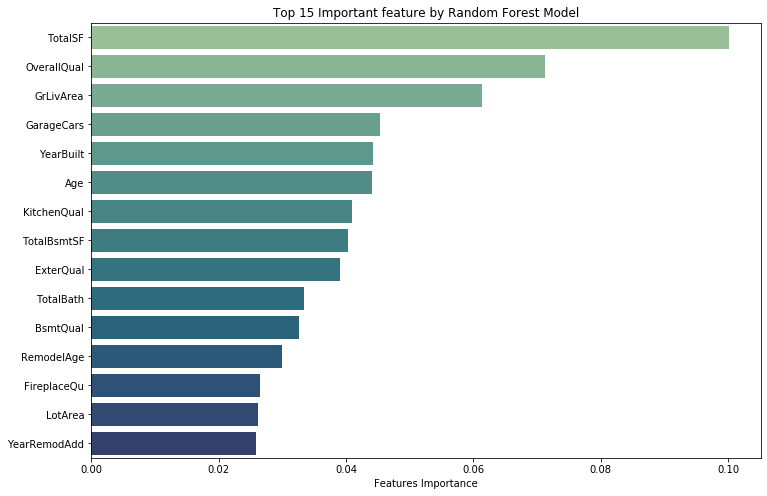

In [80]:
importance = sorted(list(zip(X_train1.columns, list(randomForest_best_fit.feature_importances_))),
                    key=lambda t:t[1], reverse=True)
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'Coef':b})

ax = sns.barplot(x="Coef", y="feature", data=importance_score[0:15], palette="crest")
ax.set_title('Top 15 Important feature by Random Forest Model')
ax.set_xlabel('Features Importance')
ax.set_ylabel('')


# XG Boost

**XG Boost with grid search and cross validation**

In [153]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


params = {'gamma' : [0],
          'learning_rate' : [0.01],
          'max_depth' : [5],
          'min_child_weight' : [1],
                        'n_estimators' : [775],
                        'random_state' : [42],
                        'reg_alpha' : [0],
                        'subsample' : [0.5]}

xgb = XGBRegressor()

grid_search_xgb = GridSearchCV(xgb, param_grid=params, n_jobs=7, cv=5)

grid_search_xgb.fit(X_train1, y_train1)

print('Best parameters:')
print(grid_search_xgb.best_params_)

print("The training accuracy is: %.3f" % (grid_search_xgb.best_score_))
print("The test accuracy is: %.3f" % (grid_search_xgb.best_estimator_.score(X_test, y_test)))


Best parameters:
{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 775, 'random_state': 42, 'reg_alpha': 0, 'subsample': 0.5}
The training accuracy is: 0.891
The test accuracy is: 0.890


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [154]:
#predicting MAE and RMSE values
y_trainpredicted_xgb = grid_search_xgb.predict(X_train1)
RMSE_train = np.sqrt(mean_squared_error(y_train1, y_trainpredicted_xgb))
MAE_train = mean_absolute_error(y_train1, y_trainpredicted_xgb)


y_testpredicted_xgb = grid_search_xgb.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test,y_testpredicted_xgb))
MAE_test = mean_absolute_error(y_test,y_testpredicted_xgb)




print('MAE for train data is: %.3f' % MAE_train)
print('MAE for test data is: %.3f' % MAE_test)

print('-'*50)

print('RMSE for train data is: %.3f' % RMSE_train)
print('RMSE for test data is: %.3f' % RMSE_test)

MAE for train data is: 0.057
MAE for test data is: 0.093
--------------------------------------------------
RMSE for train data is: 0.073
RMSE for test data is: 0.144


/Applications/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/Applications/anaconda3/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [111]:
XGB_bestfit = grid_search_xgb.best_estimator_.fit(X_train, y_train)

Text(0, 0.5, '')

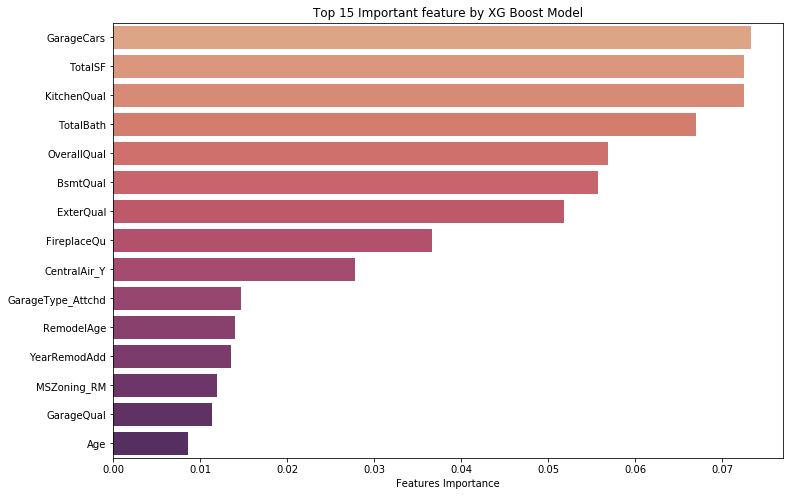

In [113]:
#Feature importance by XG boost
importance = sorted(list(zip(X_train1.columns, list(XGB_bestfit.feature_importances_))),
                    key=lambda t:t[1], reverse=True)
a, b = zip(*importance)
importance_score = pd.DataFrame({'feature':a, 'Coef':b})

ax = sns.barplot(x="Coef", y="feature", data=importance_score[0:15], palette="flare")
ax.set_title('Top 15 Important feature by XG Boost Model')
ax.set_xlabel('Features Importance')
ax.set_ylabel('')

In [161]:
results = results.append({'Model' : 'XG Boost' , 'R^2_train' :89.1, 'R^2_test' :89.0, 'MAE' : 0.093, 'RMSE' : 0.144, 
                          'y_test' : np.mean(np.exp(y_test)),'y_predicted' : np.mean(np.exp(y_testpredicted_xgb))},
               ignore_index = True)
results

,Model,R^2_train,R^2_test,MAE,RMSE,y_test,y_predicted
0,Multiple Regression,92.4,89.6,0.108,0.139,178839.811644,175780.252775
1,Ridge Regression,93.6,90.0,0.099,0.136,178839.811644,177306.200829
2,Lasso Regression,85.5,85.2,0.133,0.168,178839.811644,172971.511394
3,Multiple Regression(Improvised),88.5,88.2,0.336,0.166,178839.811644,176551.520841
4,Random Forest,85.9,84.9,0.105,0.168,178839.811644,173339.151793
5,XG Boost,89.1,89.0,0.093,0.144,178839.811644,175192.328125


# Conclusion

Among all the Linear models,the intial Multile regression model have issues of overfitting due to the issue of multicollinearity. However the performace of the model was better with data modified by  feature selction by lasso. The XG boost also performed much better with lower RMSE values. But due simplicity of interpretretation of model and good featur selection, Multiple linear regreesion model was chosed

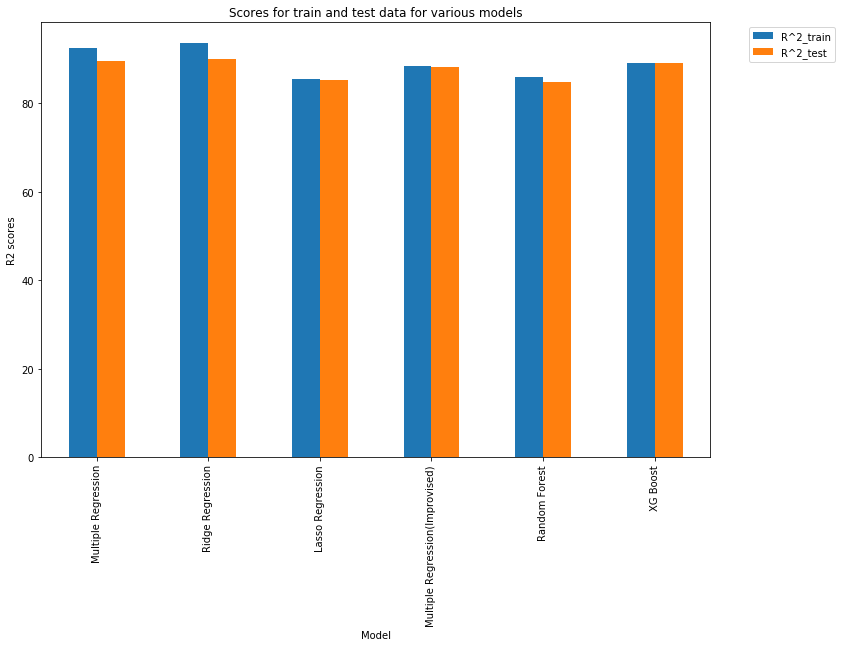

In [170]:
#Comparative study of the different accuracy scores of various models
results.plot(x = 'Model', y = ['R^2_train', 'R^2_test'], kind = 'bar')
plt.title('Scores for train and test data for various models')
plt.ylabel('R2 scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


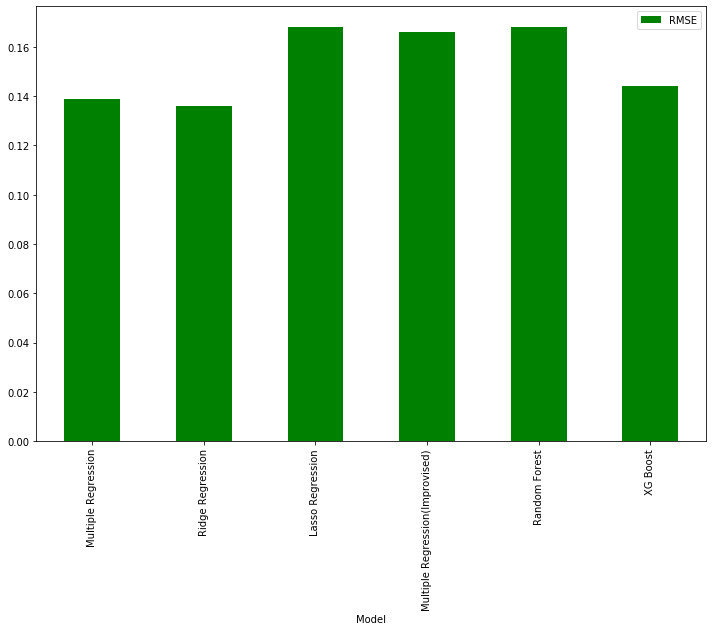

In [174]:
#Comparision of the various RMSE values of various models
results.plot(x = 'Model', y = ['RMSE'], kind = 'bar', color = 'green')

## Multiple regression on actual test data

In [175]:
pr1 = np.mean(np.exp(y_trainpredicted_mlr))
pr1

177648.3157393558

In [195]:
test_selFeat = test_final[selected_feature]
test_predict = mlr.predict(test_selFeat)

In [196]:
test_saleprice = np.mean(np.exp(test_predict))
test_saleprice

182444.37130685445

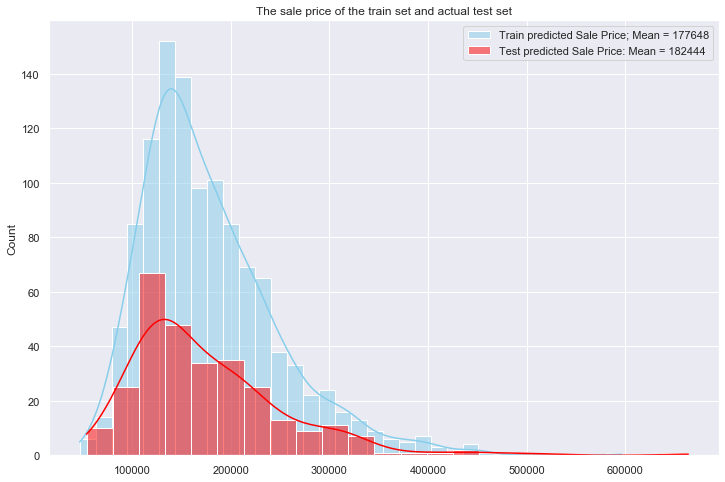

In [201]:
sns.set(style="darkgrid")

sns.histplot(x=np.exp(train_predict_ridge), color="skyblue", label="Train predicted Sale Price; Mean = 177648", kde=True)
sns.histplot(x= np.exp(test_predict_ridge), color="red", label="Test predicted Sale Price: Mean = 182444", kde=True)

plt.title('The sale price of the train set and actual test set')
plt.legend() 


When the multiple regression model was fitted in the actual test data, the mean sale price was approx 182,000 and for the train data it was 178,000 with a difference of approxmately $4000 which is quite reasonable

The feature selection by Lasso as well as XG boost also revel that the sale price depends a lot on the overall quality as well as the quality of exterior, kitchen and garage. Remodeeling or upgrading the overall quality would definately give good price for the house.